# Lab-3 Template

Answer questions in the designated cells

### Quick review of different scalers  

Below simulation and graphs are provided to demonstrate difference between different scalers

- Robust scaler - provides better encoding for distributions with outliers
- Standard scaler - provides scaling for distributions close to normal
- Min-Max scaler - general scaler but with weak point in regard to outliers

You will need to install "seaborn" library in your virtual environment

In [99]:
# Uncomment below line if you need to install seaborn
!pip install seaborn

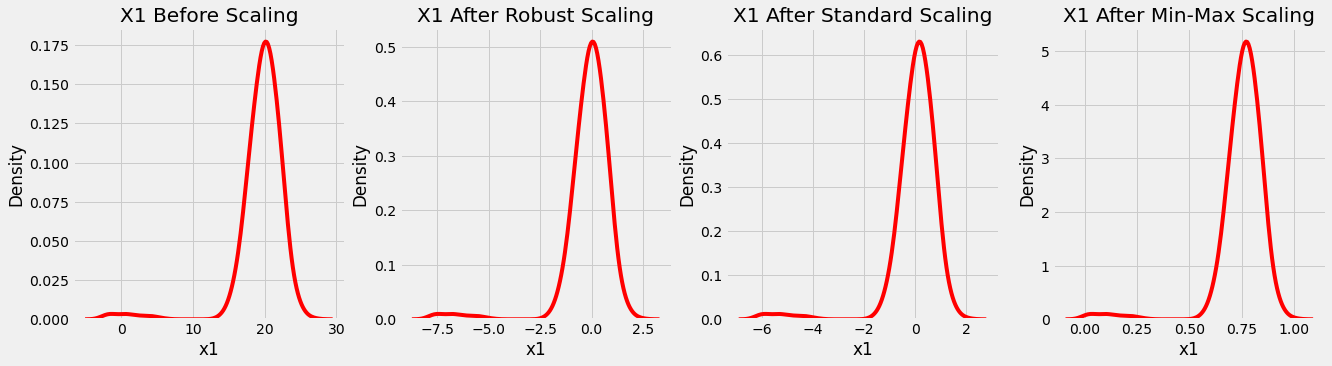

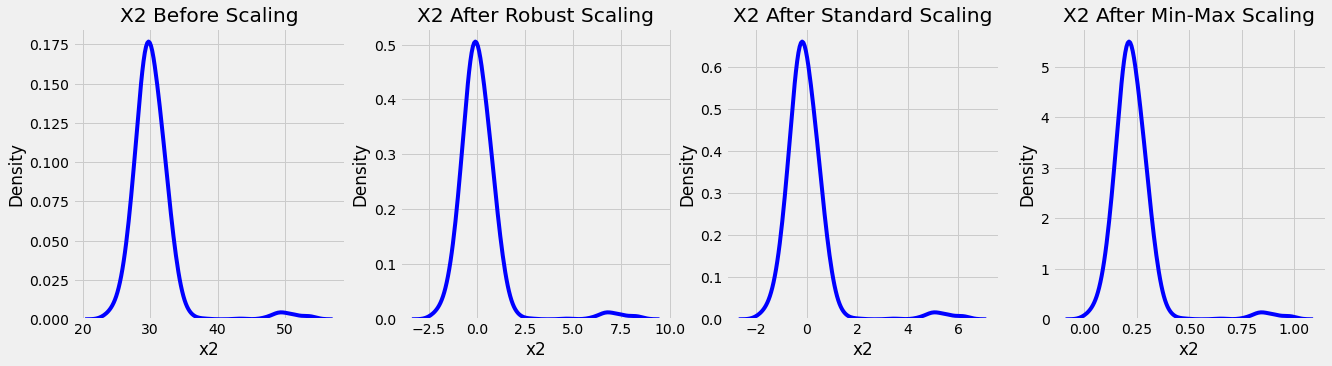

In [100]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
matplotlib.style.use('fivethirtyeight')

# data
x = pd.DataFrame({
	# Distribution with lower outliers
	'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
	# Distribution with higher outliers
	'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('X1 Before Scaling')
sns.kdeplot(x['x1'], ax = ax1, color ='r')

ax2.set_title('X1 After Robust Scaling')
sns.kdeplot(robust_df['x1'], ax = ax2, color ='r')

ax3.set_title('X1 After Standard Scaling')
sns.kdeplot(standard_df['x1'], ax = ax3, color ='r')

ax4.set_title('X1 After Min-Max Scaling')
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='r')
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('X2 Before Scaling')
sns.kdeplot(x['x2'], ax = ax1, color ='b')

ax2.set_title('X2 After Robust Scaling')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='b')

ax3.set_title('X2 After Standard Scaling')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='b')
ax4.set_title('X2 After Min-Max Scaling')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='b')
plt.show()

## Preparation

Use dataset provided in the eLearning

In [101]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [102]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

### Load data

In [103]:
#train_df = pd.read_csv('./data/SBA_loans_small.zip')
X_train = pd.read_csv('Car_Prices_Poland_train.csv')
X_test  = pd.read_csv('Car_Prices_Poland_test.csv')

In [104]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (88445, 10)
Test shape: (29482, 10)


In [105]:
X_train.isna().sum()

mark                   0
model                  0
generation_name    22551
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [106]:
X_train.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,insignia,gen-a-2008-2017,2009,106125,1796,Gasoline,Częstochowa,Śląskie,25000
1,skoda,fabia,gen-ii-2007,2010,207000,1200,Gasoline,Bydgoszcz,Kujawsko-pomorskie,11900
2,opel,insignia,gen-a-2008-2017,2013,195000,1956,Diesel,Ruda Śląska,Śląskie,24598
3,audi,a4,gen-b8-2007-2015,2012,280000,1968,Diesel,Białystok,Podlaskie,41900
4,citroen,c4-picasso,gen-ii-2013-c4-picasso,2014,122200,1560,Diesel,Dziemionna,Kujawsko-pomorskie,39500


In [107]:
X_train.describe()

,year,mileage,vol_engine,price
count,88445.000000,8.844500e+04,88445.000000,8.844500e+04
mean,2012.933428,1.408320e+05,1812.341907,7.034750e+04
std,5.684016,9.251080e+04,646.731501,8.527590e+04
min,1964.000000,0.000000e+00,0.000000,5.000000e+02
25%,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,2013.000000,1.463000e+05,1796.000000,4.190000e+04
75%,2018.000000,2.030000e+05,1995.000000,8.390000e+04
max,2022.000000,2.800000e+06,7600.000000,2.399900e+06


In [108]:
desc_df = describe_more(X_train)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,mark,23,object,3,13,"{'audi': 9042, 'opel': 8898, 'bmw': 8306, 'vol..."
1,model,328,object,1,16,"{'astra': 2479, 'seria-3': 2228, 'a4': 2181, '..."
2,generation_name,364,object,3,30,"{'gen-8p-2003-2012': 1179, 'gen-j-2009-2015': ..."
3,year,51,int64,4,4,"{2021: 7963, 2017: 6672, 2018: 6482, 2016: 529..."
4,mileage,27980,int64,1,7,"{1: 2809, 5: 2416, 10: 1089, 180000: 541, 2200..."
5,vol_engine,465,int64,1,4,"{1598: 7636, 1968: 6101, 1995: 4868, 1997: 400..."
6,fuel,6,object,3,8,"{'Gasoline': 46298, 'Diesel': 36212, 'LPG': 31..."
7,city,3951,object,2,24,"{'Warszawa': 5980, 'Łódź': 2498, 'Kraków': 225..."
8,province,23,object,1,24,"{'Mazowieckie': 16685, 'Śląskie': 12517, 'Wiel..."
9,price,8025,int64,3,7,"{19900: 1009, 39900: 858, 29900: 853, 18900: 8..."


Explore valid values and counts for the variable `mark` 

In [109]:
desc_df.iloc[0]["Level_Values"]

{'audi': 9042,
 'opel': 8898,
 'bmw': 8306,
 'volkswagen': 8072,
 'ford': 7216,
 'mercedes-benz': 5325,
 'renault': 5202,
 'skoda': 4412,
 'toyota': 3878,
 'peugeot': 3848,
 'volvo': 3299,
 'hyundai': 3042,
 'kia': 2828,
 'nissan': 2332,
 'mazda': 2157,
 'fiat': 2150,
 'seat': 2132,
 'citroen': 2031,
 'honda': 1620,
 'mitsubishi': 851,
 'mini': 810,
 'alfa-romeo': 535,
 'chevrolet': 459}

# Question 1 - 1 point

Replace missing values for all columns for both X_train and X_test.
Replace Na's with zero for numerical variables and with "Missing" for categorical

In [110]:
cols = X_train.columns[X_train.dtypes==object]
X_train[cols] = X_train[cols].fillna('Missing')
X_train = X_train.fillna(0)
X_train

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,insignia,gen-a-2008-2017,2009,106125,1796,Gasoline,Częstochowa,Śląskie,25000
1,skoda,fabia,gen-ii-2007,2010,207000,1200,Gasoline,Bydgoszcz,Kujawsko-pomorskie,11900
2,opel,insignia,gen-a-2008-2017,2013,195000,1956,Diesel,Ruda Śląska,Śląskie,24598
3,audi,a4,gen-b8-2007-2015,2012,280000,1968,Diesel,Białystok,Podlaskie,41900
4,citroen,c4-picasso,gen-ii-2013-c4-picasso,2014,122200,1560,Diesel,Dziemionna,Kujawsko-pomorskie,39500
...,...,...,...,...,...,...,...,...,...,...
88440,skoda,kodiaq,Missing,2018,79667,1395,Gasoline,Łódź,Łódzkie,134900
88441,peugeot,5008,gen-i-2009-2017,2009,201365,1600,Gasoline,Chmielnik,Świętokrzyskie,22900
88442,nissan,note,gen-i-2005-2013,2007,123501,1386,Gasoline,Bielany Wrocławskie,Dolnośląskie,15500
88443,opel,astra,gen-h-2004-2013,2005,250000,1686,Diesel,Katowice,Śląskie,5800


In [111]:
cols = X_test.columns[X_test.dtypes==object]
X_test[cols] = X_test[cols].fillna('Missing')
X_test = X_test.fillna(0)
X_test

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,skoda,octavia,gen-iii-2013,2016,63000,1598,Diesel,Szamotuły,Wielkopolskie,49500
1,ford,mustang,Missing,1967,1,6384,Gasoline,Łódź,Łódzkie,379900
2,mini,cooper,Missing,2016,125600,1998,Gasoline,Poznań,Wielkopolskie,99800
3,hyundai,santa-fe,gen-iii-2012-santa-fe,2014,270000,2199,Diesel,Radziejów,Kujawsko-pomorskie,59900
4,renault,clio,gen-v-2019,2019,24000,999,Gasoline,Leszno,Wielkopolskie,56999
...,...,...,...,...,...,...,...,...,...,...
29477,ford,mondeo,gen-mk5-2014,2018,115000,1500,Gasoline,Warszawa,Mazowieckie,64900
29478,skoda,octavia,gen-i-1996-2011,2002,189912,1595,Gasoline,Gdańsk,Pomorskie,6999
29479,mercedes-benz,e-klasa,gen-w213-2016,2020,25800,1950,Diesel,Straszyn,Pomorskie,259900
29480,skoda,octavia,gen-iii-2013,2018,127695,1598,Diesel,Novy Jicin,Moravian-Silesian Region,71667


In [112]:
X_train.isna().sum()

mark               0
model              0
generation_name    0
year               0
mileage            0
vol_engine         0
fuel               0
city               0
province           0
price              0
dtype: int64

In [113]:
X_test.isna().sum()

mark               0
model              0
generation_name    0
year               0
mileage            0
vol_engine         0
fuel               0
city               0
province           0
price              0
dtype: int64

## Question 2 - 3 points

For the categorical variables listed below:  
- Use LabelEncoder to encode if number of levels is more than 24 (including)
- Use one-hot-encoding to encode if number of levels is less than or equal to 23. You can use Pandas or `sklearn` approach
- make sure encoder is created from X_train only
- X_test will be encoded from the corresponding encoder above
- Give new columns names "Original-name"_le or "Original-name"_cat_name. Where "cat_name" is valid value present in categorical feature. For example, if column "A" contains values "a, b,c" new column names will be "A_a", "A_b" and "A_c"

Good starting point: https://www.guidodiepen.nl/2021/02/keeping-column-names-when-using-sklearn-onehotencoder-on-pandas-dataframe/

**Don't copy the code, only use the approach!!!**

You will need to handle situation when certain value of categorical variable doesn't appear in Training set but present in Testing set. Simple way to handle it, is to concatenate the sets. More complex way see discussion here:
https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values
You would need to add "Unknown" label, the discussion with 31 votes:
```
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)
```        

In [114]:
len_data = len(X_train)
for col in X_train.drop(columns=['price']).columns:
  if X_train[col].dtype == 'object':
    print("Column ",col," has ",X_train[col].nunique()," values")

Column  mark  has  23  values
Column  model  has  328  values
Column  generation_name  has  365  values
Column  fuel  has  6  values
Column  city  has  3951  values
Column  province  has  23  values


In [115]:
class LabelEncoderExt(object):
    def __init__(self):
        
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
       
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [116]:
data = X_train.copy()
test = X_test.copy()

from sklearn.preprocessing import LabelEncoder

e = LabelEncoderExt()
e1 = LabelEncoderExt()
e2 = LabelEncoderExt()

e.fit(data['model'])
e1.fit(data['generation_name'])
e2.fit(data['city'])

data['model_le'] = e.transform(data['model'])
data['generation_name_le'] = e1.transform(data['generation_name'])
data['city_le'] = e2.transform(data['city'])

data

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price,model_le,generation_name_le,city_le
0,opel,insignia,gen-a-2008-2017,2009,106125,1796,Gasoline,Częstochowa,Śląskie,25000,160,12,546
1,skoda,fabia,gen-ii-2007,2010,207000,1200,Gasoline,Bydgoszcz,Kujawsko-pomorskie,11900,124,165,330
2,opel,insignia,gen-a-2008-2017,2013,195000,1956,Diesel,Ruda Śląska,Śląskie,24598,160,12,2689
3,audi,a4,gen-b8-2007-2015,2012,280000,1968,Diesel,Białystok,Podlaskie,41900,27,32,110
4,citroen,c4-picasso,gen-ii-2013-c4-picasso,2014,122200,1560,Diesel,Dziemionna,Kujawsko-pomorskie,39500,68,194,659
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88440,skoda,kodiaq,Missing,2018,79667,1395,Gasoline,Łódź,Łódzkie,134900,172,0,3837
88441,peugeot,5008,gen-i-2009-2017,2009,201365,1600,Gasoline,Chmielnik,Świętokrzyskie,22900,15,139,391
88442,nissan,note,gen-i-2005-2013,2007,123501,1386,Gasoline,Bielany Wrocławskie,Dolnośląskie,15500,201,123,119
88443,opel,astra,gen-h-2004-2013,2005,250000,1686,Diesel,Katowice,Śląskie,5800,48,99,1218


In [117]:
test['model_le'] = e.transform(test['model'])
test['generation_name_le'] = e1.transform(test['generation_name'])
test['city_le'] = e2.transform(test['city'])

test

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price,model_le,generation_name_le,city_le
0,skoda,octavia,gen-iii-2013,2016,63000,1598,Diesel,Szamotuły,Wielkopolskie,49500,202,239,3110
1,ford,mustang,Missing,1967,1,6384,Gasoline,Łódź,Łódzkie,379900,197,0,3837
2,mini,cooper,Missing,2016,125600,1998,Gasoline,Poznań,Wielkopolskie,99800,91,0,2454
3,hyundai,santa-fe,gen-iii-2012-santa-fe,2014,270000,2199,Diesel,Radziejów,Kujawsko-pomorskie,59900,248,238,2609
4,renault,clio,gen-v-2019,2019,24000,999,Gasoline,Leszno,Wielkopolskie,56999,85,314,1595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,ford,mondeo,gen-mk5-2014,2018,115000,1500,Gasoline,Warszawa,Mazowieckie,64900,194,293,3382
29478,skoda,octavia,gen-i-1996-2011,2002,189912,1595,Gasoline,Gdańsk,Pomorskie,6999,202,103,751
29479,mercedes-benz,e-klasa,gen-w213-2016,2020,25800,1950,Diesel,Straszyn,Pomorskie,259900,110,351,3017
29480,skoda,octavia,gen-iii-2013,2018,127695,1598,Diesel,Novy Jicin,Moravian-Silesian Region,71667,202,239,2043


In [118]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
e1 = OneHotEncoder(handle_unknown='ignore', sparse=False)
e2= OneHotEncoder(handle_unknown='ignore', sparse=False)

enc.fit(data[["mark"]])
result = enc.transform(data[["mark"]])
ohe_columns = ["mark"+"_"+str(x) for x in enc.categories_[0]]
result_df = pd.DataFrame(result, columns=ohe_columns)
data = pd.concat([data, result_df], axis=1)

e1.fit(data[["fuel"]])
result = e1.transform(data[["fuel"]])
ohe_columns = ["fuel"+"_"+str(x) for x in e1.categories_[0]]
result_df = pd.DataFrame(result, columns=ohe_columns)
data = pd.concat([data, result_df], axis=1)


e2.fit(data[["province"]])
result = e2.transform(data[["province"]])
ohe_columns = ["province"+"_"+str(x) for x in e2.categories_[0]]
result_df = pd.DataFrame(result, columns=ohe_columns)
data = pd.concat([data, result_df], axis=1)

data


,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price,model_le,generation_name_le,city_le,mark_alfa-romeo,mark_audi,mark_bmw,mark_chevrolet,mark_citroen,mark_fiat,mark_ford,mark_honda,mark_hyundai,mark_kia,mark_mazda,mark_mercedes-benz,mark_mini,mark_mitsubishi,mark_nissan,mark_opel,mark_peugeot,mark_renault,mark_seat,mark_skoda,mark_toyota,mark_volkswagen,mark_volvo,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_Hybrid,fuel_LPG,province_(,province_Berlin,province_Dolnośląskie,province_Kujawsko-pomorskie,province_Lubelskie,province_Lubuskie,province_Mazowieckie,province_Małopolskie,province_Moravian-Silesian Region,province_Niedersachsen,province_Nordrhein-Westfalen,province_Opolskie,province_Podkarpackie,province_Podlaskie,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wiedeń,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie
0,opel,insignia,gen-a-2008-2017,2009,106125,1796,Gasoline,Częstochowa,Śląskie,25000,160,12,546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,skoda,fabia,gen-ii-2007,2010,207000,1200,Gasoline,Bydgoszcz,Kujawsko-pomorskie,11900,124,165,330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,opel,insignia,gen-a-2008-2017,2013,195000,1956,Diesel,Ruda Śląska,Śląskie,24598,160,12,2689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,audi,a4,gen-b8-2007-2015,2012,280000,1968,Diesel,Białystok,Podlaskie,41900,27,32,110,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,citroen,c4-picasso,gen-ii-2013-c4-picasso,2014,122200,1560,Diesel,Dziemionna,Kujawsko-pomorskie,39500,68,194,659,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88440,skoda,kodiaq,Missing,2018,79667,1395,Gasoline,Łódź,Łódzkie,134900,172,0,3837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
88441,peugeot,5008,gen-i-2009-2017,2009,201365,1600,Gasoline,Chmielnik,Świętokrzyskie,22900,15,139,391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
88442,nissan,note,gen-i-2005-2013,2007,123501,1386,Gasoline,Bielany Wrocławskie,Dolnośląskie,15500,201,123,119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88443,opel,astra,gen-h-2004-2013,2005,250000,1686,Diesel,Katowice,Śląskie,5800,48,99,1218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [119]:
result = enc.transform(test[["mark"]])
ohe_columns = ["mark"+"_"+str(x) for x in enc.categories_[0]]
result_df = pd.DataFrame(result, columns=ohe_columns)
test = pd.concat([test, result_df], axis=1)

result = e1.transform(test[["fuel"]])
ohe_columns = ["fuel"+"_"+str(x) for x in e1.categories_[0]]
result_df = pd.DataFrame(result, columns=ohe_columns)
test = pd.concat([test, result_df], axis=1)


result = e2.transform(test[["province"]])
ohe_columns = ["province"+"_"+str(x) for x in e2.categories_[0]]
result_df = pd.DataFrame(result, columns=ohe_columns)
test = pd.concat([test, result_df], axis=1)


test

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price,model_le,generation_name_le,city_le,mark_alfa-romeo,mark_audi,mark_bmw,mark_chevrolet,mark_citroen,mark_fiat,mark_ford,mark_honda,mark_hyundai,mark_kia,mark_mazda,mark_mercedes-benz,mark_mini,mark_mitsubishi,mark_nissan,mark_opel,mark_peugeot,mark_renault,mark_seat,mark_skoda,mark_toyota,mark_volkswagen,mark_volvo,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_Hybrid,fuel_LPG,province_(,province_Berlin,province_Dolnośląskie,province_Kujawsko-pomorskie,province_Lubelskie,province_Lubuskie,province_Mazowieckie,province_Małopolskie,province_Moravian-Silesian Region,province_Niedersachsen,province_Nordrhein-Westfalen,province_Opolskie,province_Podkarpackie,province_Podlaskie,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wiedeń,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie
0,skoda,octavia,gen-iii-2013,2016,63000,1598,Diesel,Szamotuły,Wielkopolskie,49500,202,239,3110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,ford,mustang,Missing,1967,1,6384,Gasoline,Łódź,Łódzkie,379900,197,0,3837,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,mini,cooper,Missing,2016,125600,1998,Gasoline,Poznań,Wielkopolskie,99800,91,0,2454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,hyundai,santa-fe,gen-iii-2012-santa-fe,2014,270000,2199,Diesel,Radziejów,Kujawsko-pomorskie,59900,248,238,2609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,renault,clio,gen-v-2019,2019,24000,999,Gasoline,Leszno,Wielkopolskie,56999,85,314,1595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,ford,mondeo,gen-mk5-2014,2018,115000,1500,Gasoline,Warszawa,Mazowieckie,64900,194,293,3382,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29478,skoda,octavia,gen-i-1996-2011,2002,189912,1595,Gasoline,Gdańsk,Pomorskie,6999,202,103,751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29479,mercedes-benz,e-klasa,gen-w213-2016,2020,25800,1950,Diesel,Straszyn,Pomorskie,259900,110,351,3017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29480,skoda,octavia,gen-iii-2013,2018,127695,1598,Diesel,Novy Jicin,Moravian-Silesian Region,71667,202,239,2043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 3 - 1 point

Use MinMax scaler to encode numerical variables. Be careful not to scale new columns you have created as part of categorical features encoding


In [120]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[["year_scaled","mileage_scaled","vol_engine_scaled","price_scaled"]]= scaler.fit_transform(data[["year","mileage","vol_engine","price"]])
data

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price,model_le,generation_name_le,city_le,mark_alfa-romeo,mark_audi,mark_bmw,mark_chevrolet,mark_citroen,mark_fiat,mark_ford,mark_honda,mark_hyundai,mark_kia,mark_mazda,mark_mercedes-benz,mark_mini,mark_mitsubishi,mark_nissan,mark_opel,mark_peugeot,mark_renault,mark_seat,mark_skoda,mark_toyota,mark_volkswagen,mark_volvo,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_Hybrid,fuel_LPG,province_(,province_Berlin,province_Dolnośląskie,province_Kujawsko-pomorskie,province_Lubelskie,province_Lubuskie,province_Mazowieckie,province_Małopolskie,province_Moravian-Silesian Region,province_Niedersachsen,province_Nordrhein-Westfalen,province_Opolskie,province_Podkarpackie,province_Podlaskie,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wiedeń,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie,year_scaled,mileage_scaled,vol_engine_scaled,price_scaled
0,opel,insignia,gen-a-2008-2017,2009,106125,1796,Gasoline,Częstochowa,Śląskie,25000,160,12,546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.775862,0.037902,0.236316,0.010211
1,skoda,fabia,gen-ii-2007,2010,207000,1200,Gasoline,Bydgoszcz,Kujawsko-pomorskie,11900,124,165,330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.073929,0.157895,0.004751
2,opel,insignia,gen-a-2008-2017,2013,195000,1956,Diesel,Ruda Śląska,Śląskie,24598,160,12,2689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.844828,0.069643,0.257368,0.010043
3,audi,a4,gen-b8-2007-2015,2012,280000,1968,Diesel,Białystok,Podlaskie,41900,27,32,110,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.827586,0.100000,0.258947,0.017254
4,citroen,c4-picasso,gen-ii-2013-c4-picasso,2014,122200,1560,Diesel,Dziemionna,Kujawsko-pomorskie,39500,68,194,659,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862069,0.043643,0.205263,0.016254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88440,skoda,kodiaq,Missing,2018,79667,1395,Gasoline,Łódź,Łódzkie,134900,172,0,3837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.931034,0.028453,0.183553,0.056014
88441,peugeot,5008,gen-i-2009-2017,2009,201365,1600,Gasoline,Chmielnik,Świętokrzyskie,22900,15,139,391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.775862,0.071916,0.210526,0.009336
88442,nissan,note,gen-i-2005-2013,2007,123501,1386,Gasoline,Bielany Wrocławskie,Dolnośląskie,15500,201,123,119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.74

In [121]:
test[["year_scaled","mileage_scaled","vol_engine_scaled","price_scaled"]]= scaler.transform(test[["year","mileage","vol_engine","price"]])
test

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price,model_le,generation_name_le,city_le,mark_alfa-romeo,mark_audi,mark_bmw,mark_chevrolet,mark_citroen,mark_fiat,mark_ford,mark_honda,mark_hyundai,mark_kia,mark_mazda,mark_mercedes-benz,mark_mini,mark_mitsubishi,mark_nissan,mark_opel,mark_peugeot,mark_renault,mark_seat,mark_skoda,mark_toyota,mark_volkswagen,mark_volvo,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_Hybrid,fuel_LPG,province_(,province_Berlin,province_Dolnośląskie,province_Kujawsko-pomorskie,province_Lubelskie,province_Lubuskie,province_Mazowieckie,province_Małopolskie,province_Moravian-Silesian Region,province_Niedersachsen,province_Nordrhein-Westfalen,province_Opolskie,province_Podkarpackie,province_Podlaskie,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wiedeń,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie,year_scaled,mileage_scaled,vol_engine_scaled,price_scaled
0,skoda,octavia,gen-iii-2013,2016,63000,1598,Diesel,Szamotuły,Wielkopolskie,49500,202,239,3110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.896552,2.250000e-02,0.210263,0.020422
1,ford,mustang,Missing,1967,1,6384,Gasoline,Łódź,Łódzkie,379900,197,0,3837,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.051724,3.571429e-07,0.840000,0.158123
2,mini,cooper,Missing,2016,125600,1998,Gasoline,Poznań,Wielkopolskie,99800,91,0,2454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.896552,4.485714e-02,0.262895,0.041385
3,hyundai,santa-fe,gen-iii-2012-santa-fe,2014,270000,2199,Diesel,Radziejów,Kujawsko-pomorskie,59900,248,238,2609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862069,9.642857e-02,0.289342,0.024756
4,renault,clio,gen-v-2019,2019,24000,999,Gasoline,Leszno,Wielkopolskie,56999,85,314,1595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.948276,8.571429e-03,0.131447,0.023547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,ford,mondeo,gen-mk5-2014,2018,115000,1500,Gasoline,Warszawa,Mazowieckie,64900,194,293,3382,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.931034,4.107143e-02,0.197368,0.026840
29478,skoda,octavia,gen-i-1996-2011,2002,189912,1595,Gasoline,Gdańsk,Pomorskie,6999,202,103,751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.655172,6.782571e-02,0.209868,0.002709
29479,mercedes-benz,e-klasa,gen-w213-2016,2020,25800,1950,Diesel,Straszyn,Pomorskie,259900,110,351,3017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.965517,

In [122]:

train_X = data.drop(columns=["price","model","generation_name","city","year","mileage","vol_engine","mark","fuel","province","price_scaled"])
train_X

,model_le,generation_name_le,city_le,mark_alfa-romeo,mark_audi,mark_bmw,mark_chevrolet,mark_citroen,mark_fiat,mark_ford,mark_honda,mark_hyundai,mark_kia,mark_mazda,mark_mercedes-benz,mark_mini,mark_mitsubishi,mark_nissan,mark_opel,mark_peugeot,mark_renault,mark_seat,mark_skoda,mark_toyota,mark_volkswagen,mark_volvo,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_Hybrid,fuel_LPG,province_(,province_Berlin,province_Dolnośląskie,province_Kujawsko-pomorskie,province_Lubelskie,province_Lubuskie,province_Mazowieckie,province_Małopolskie,province_Moravian-Silesian Region,province_Niedersachsen,province_Nordrhein-Westfalen,province_Opolskie,province_Podkarpackie,province_Podlaskie,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wiedeń,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie,year_scaled,mileage_scaled,vol_engine_scaled
0,160,12,546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.775862,0.037902,0.236316
1,124,165,330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.073929,0.157895
2,160,12,2689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.844828,0.069643,0.257368
3,27,32,110,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.827586,0.100000,0.258947
4,68,194,659,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862069,0.043643,0.205263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88440,172,0,3837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.931034,0.028453,0.183553
88441,15,139,391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.775862,0.071916,0.210526
88442,201,123,119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.741379,0.044108,0.182368
88443,48,99,1218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.706897,0.089286,0.221842


In [123]:
train_Y = data["price_scaled"]
train_Y

0        0.010211
1        0.004751
2        0.010043
3        0.017254
4        0.016254
           ...   
88440    0.056014
88441    0.009336
88442    0.006252
88443    0.002209
88444    0.016838
Name: price_scaled, Length: 88445, dtype: float64

In [124]:
test_X = test.drop(columns=["price","model","generation_name","city","year","mileage","vol_engine","mark","fuel","province","price_scaled"])
test_X

,model_le,generation_name_le,city_le,mark_alfa-romeo,mark_audi,mark_bmw,mark_chevrolet,mark_citroen,mark_fiat,mark_ford,mark_honda,mark_hyundai,mark_kia,mark_mazda,mark_mercedes-benz,mark_mini,mark_mitsubishi,mark_nissan,mark_opel,mark_peugeot,mark_renault,mark_seat,mark_skoda,mark_toyota,mark_volkswagen,mark_volvo,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_Hybrid,fuel_LPG,province_(,province_Berlin,province_Dolnośląskie,province_Kujawsko-pomorskie,province_Lubelskie,province_Lubuskie,province_Mazowieckie,province_Małopolskie,province_Moravian-Silesian Region,province_Niedersachsen,province_Nordrhein-Westfalen,province_Opolskie,province_Podkarpackie,province_Podlaskie,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wiedeń,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie,year_scaled,mileage_scaled,vol_engine_scaled
0,202,239,3110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.896552,2.250000e-02,0.210263
1,197,0,3837,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.051724,3.571429e-07,0.840000
2,91,0,2454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.896552,4.485714e-02,0.262895
3,248,238,2609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862069,9.642857e-02,0.289342
4,85,314,1595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.948276,8.571429e-03,0.131447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,194,293,3382,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.931034,4.107143e-02,0.197368
29478,202,103,751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.655172,6.782571e-02,0.209868
29479,110,351,3017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.965517,9.214286e-03,0.256579
29480,202,239,2043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.931034,4.560536e-02,0.210263


In [125]:
test_Y = test["price_scaled"]
test_Y

0        0.020422
1        0.158123
2        0.041385
3        0.024756
4        0.023547
           ...   
29477    0.026840
29478    0.002709
29479    0.108110
29480    0.029660
29481    0.015629
Name: price_scaled, Length: 29482, dtype: float64

## Question 4 - 2 points

Train `LinearRegression` on the Train dataset. Score Test dataset. Report performance metrics for both, Train and Test datasets.
Report following metrics:
- R-square
- Mean absolute error

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg = LinearRegression()

linreg.fit(train_X,train_Y)
prediction = linreg.predict(test_X)


In [127]:
from sklearn.metrics import mean_absolute_error

In [128]:
mean_absolute_error(test_Y,prediction)  #Mean Absolute Error for Price (test data) and predictions from Linear Regression

0.012339890410660108

#### The Mean Absolute Error of Test data is 0.012

In [129]:
from sklearn.metrics import r2_score

In [130]:
r2_score(test_Y, prediction)

0.658079873836548

In [131]:
r2_score(train_Y,linreg.predict(train_X))

0.6376859373720015

#### The value of R-square (train data) is 0.64 (approximately)
#### The value of R-square (test data) is 0.66 (approximately)


## Question 5 - 2 points

Train RidgeRegression on the Train dataset. Use `alpha=.2`. Score Test dataset. Report performance metrics for for both, Train and Test datasets. Report following metrics:
- R-square
- Mean absolute error


In [132]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.2).fit(train_X, train_Y)
ridge_predict = ridge.predict(test_X)
ridge_predict

array([0.03511197, 0.01025589, 0.03628045, ..., 0.08232513, 0.03006809,
       0.01581688])

In [133]:
mean_absolute_error(test_Y,ridge_predict) # Mean Absolute Error for Price (test data) and predictions from Ridge Regression

0.012336415867882897

#### The Mean Absolute Error of Test data is 0.012

In [134]:
r2_score(test_Y,ridge_predict)

0.6580335907151345

In [135]:
r2_score(train_Y,linreg.predict(train_X))

0.6376859373720015

#### The value of R-square (train data) is 0.64
#### The value of R-square (test data) is 0.66

## Question 6 - 2 points

Train LassoRegression on the Train dataset. Use `alpha=.2`. Score Test dataset. Report performance metrics for both, Train and Test datasets. Report following metrics:
- R-square
- Mean absolute error


In [141]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.2)
lasso = clf.fit(train_X,train_Y)
lasso_predict = lasso.predict(test_X)
lasso_predict

array([0.03011705, 0.03123487, 0.0276668 , ..., 0.02652582, 0.03003892,
       0.0297852 ])

In [138]:
mean_absolute_error(test_Y,lasso_predict)

0.02222514416289383

#### The Mean Absolute Error from LassoRegression is 0.022

In [139]:
r2_score(test_Y,lasso_predict)

0.021029319482891218

In [140]:
r2_score(train_Y,linreg.predict(train_X))

0.6376859373720015

#### The R-square for train data is 0.02
#### The R-square for test data is 0.02

## Question 7 - 2 points

Review coefficients and intercept of Lasso regression.
What can you tell about the model based on the coefficients and the intercept?
Include following:
- How can you explain to your manager meaning of coefficient?
- What is the most important variable and how does it impact price? 
- What is the least important variable? How does it impact price prediction?

In [145]:
lasso.coef_

array([ 3.27055855e-05, -5.13852095e-06,  7.32285837e-08,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

#### Lasso penalizes the sum of absolute values of coefficients.Most of the coefficients are zero. the coefficients which are responsible for large variance are converted to zero
#### lasso regression eliminates insignificant variables from our model.

In [67]:
lasso.intercept_

0.02451089127264254

#### most important variable - model (positive correlation with price)
#### least important variable - generation_name (negative correlation with price)

## Question 8 - 3 points

Train Polynomial regression degree 2. You will need to follow steps 1 and 2 below:
- Transform training dataset using `PolynomialFeatures` transformer
- Train linear regression model

Answer following questions:
- What is the R-square for the training dataset? 
- What is the R-square for the Testing dataset? 
- What can you conclude based on the training/testing scoring metrics?

In [44]:
from sklearn.preprocessing import PolynomialFeatures


In [52]:
# include polynomials up to x ** 2:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_train_X = poly.fit_transform(train_X)
poly_test_X = poly.transform(test_X)



In [53]:
print("train_X.shape: {}".format(train_X.shape))
print("poly_train.shape: {}".format(poly_train_X.shape))
print("poly_test.shape: {}".format(poly_test_X.shape))

train_X.shape: (88445, 58)
poly_train.shape: (88445, 1769)
poly_test.shape: (29482, 1769)


In [54]:
model = LinearRegression()
model.fit(poly_train_X, train_Y)
poly_pred = model.predict(poly_test_X)


In [55]:
r2_score(test_Y,poly_pred)

0.8399892288577446

In [56]:
r2_score(train_Y,model.predict(poly_train_X))

0.8325479162742406

#### The value of R-square for train data is 0.83
#### The value of R-square for test data is 0.84

#### Conclusions: 83% of variance in price is explained collectively by independent variables.